## 1.9 Python GDAL

The GDAL Python package enables you to use the power of GDAL with the familiarity of Python code. As of ArcGIS Pro 2.6, GDAL comes packaged with the ArcGIS Pro Python distribution. 

[SCREENSHOT OF GDAL IN LIST OF ARCGIS PRO PYTHON LIBRARIES]

Let’s take some time this chapter to learn how you can interface with raster in the cloud using Python. In order to follow along, you should have some familiarity with Python in ArcGIS Pro. If you do not, I recommend reading Python Scripting for ArcGIS Pro and Advanced Python Scripting for ArcGIS Pro. 
In order to work with GDAL in Python, you must ```import gdal```. Also, you should ```import numpy``` and ```import arcpy```. You will use **arcpy** to interface with the raster and show that **arcpy** can also read directly from the cloud into a **Raster** object. You will use **numpy** to understand how to visualize pixels from the image after reading the image with **gdal**.

In [1]:
import gdal
import numpy as np

Using the same file path that you have been using for the landsat image, you can open the image with gdal. You still need to put the ```/vsicurl/``` before the path for GDAL to recognize it as a file.

In [2]:
path = '/vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/LC08_L1TP_139045_20170304_20170316_01_T1_B1.TIF'
dataset = gdal.Open(path)

Once the image is read, you have access to metadata, the projection, the raster dimensions, and other properties of the image. You can see projection using the ```GetProjection()``` method.

https://gdal.org/python/osgeo.gdal.Dataset-class.html

In [3]:
prj = dataset.GetProjection()
print(prj)

PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32645"]]


You can get the band count using the ```RasterCount()``` method.

In [4]:
num_bands = dataset.RasterCount
print(num_bands)

1


You can get the size of the image from the ```RasterXSize``` and ```RasterYSize``` properties.

In [5]:
print(dataset.RasterXSize)
print(dataset.RasterYSize)

7611
7771


But how do you visuzlize the image? In order to display the image, you need to read the image into a **numpy** array. You can do that by using [```GetRasterBand()```](https://gdal.org/doxygen/classGDALDataset.html#ad96adcf07f2979ad176e37a7f8638fb6) to get the band that has the pixels you want. Then you can use [```ReadAsArray()```]() method to read the pixels into a numpy array.

In [6]:
band = dataset.GetRasterBand(1)
pixel_array = band.ReadAsArray(0, 0, dataset.RasterXSize, dataset.RasterYSize)

Once you have the pixels as a numpy array, you can visualize them using [```imshow()```](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.imshow.html), which is part of the [```matplotlib```](https://matplotlib.org/) library.

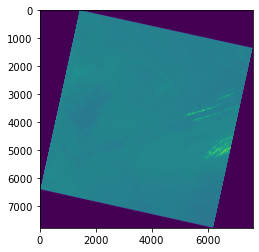

In [7]:
import matplotlib.pyplot as plt

plt.imshow(pixel_array[:, :]) 

You can follow a similar pattern when working with imagery that has multiple bands. When working with a multi-band image, you must read all the bands into a multidimensional **numpy** array. To demonstrate this, let's work with the NAIP imagery. Using **gdal** open the NAIP image.

In [8]:
path = '/vsicurl/https://naipblobs.blob.core.windows.net/naip/v002/al/2015/al_100cm_2015/30086/m_3008601_ne_16_1_20150804.tif'
dataset = gdal.Open(path)

You can verify that this image has four bands by calling ```RasterCount```.

In [9]:
num_bands = dataset.RasterCount
print(num_bands)

4


Now, instead of reading the pixels directly into a **numpy** array, use numpy to initialize a four band array using the [```numpy.zeros```](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). 

In [10]:
pixel_array = np.zeros((num_bands, dataset.RasterYSize, dataset.RasterXSize))

After initializing the array, iterate over all four bands, inserting them into the four band array.

In [11]:
for band_num in range(num_bands):
    band = dataset.GetRasterBand(band_num+1)
    pixel_array[band_num, :, :] = band.ReadAsArray(0, 0, dataset.RasterXSize, dataset.RasterYSize)

This gets a little bit more complicated, however, you can plot all of the bands of the image individually using ```imshow``` again. However, now you need to iterate over all the bands.

<Figure size 1152x1152 with 0 Axes>

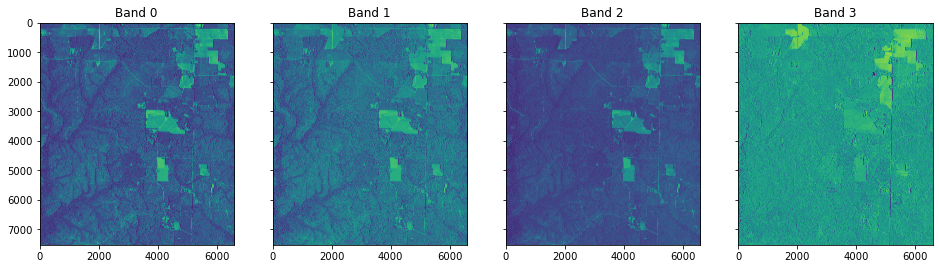

In [12]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(1, num_bands, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(num_bands):
    ax[i].imshow(pixel_array[i, :, :]) 
    plt.setp(ax[i],title="Band " + str(i))

I hope you can see how powerful understanding and utilizing Python GDAL can be. You have just directly read pixels from AWS and Azure into numpy arrays. With all the data stored in AWS and Azure, think of the various kinds of analysis you can take on!

While we are discussion Python, this is also a good opportunity to see whether these images can be read into ```arcpy```. Let's validate that we can read images directly from the cloud into [```arcpy.Raster```](https://pro.arcgis.com/en/pro-app/arcpy/classes/raster-object.htm) objects. Start by importing ```arcpy```.

In [13]:
import arcpy

Then, read the Landsat image into a raster object and display it.

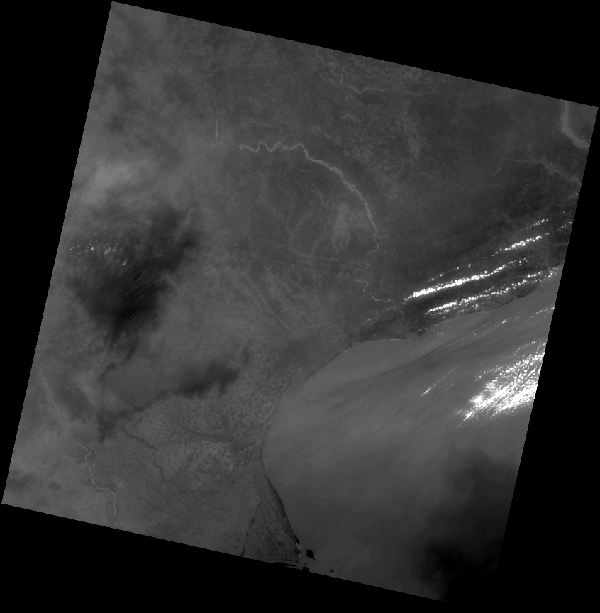

In [14]:
landsat_raster = arcpy.Raster('/vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/139/045/LC08_L1TP_139045_20170304_20170316_01_T1/LC08_L1TP_139045_20170304_20170316_01_T1_B1.TIF')
landsat_raster 

Wow! That was easy, wasn't it? Working with NAIP in Azure works the same way.

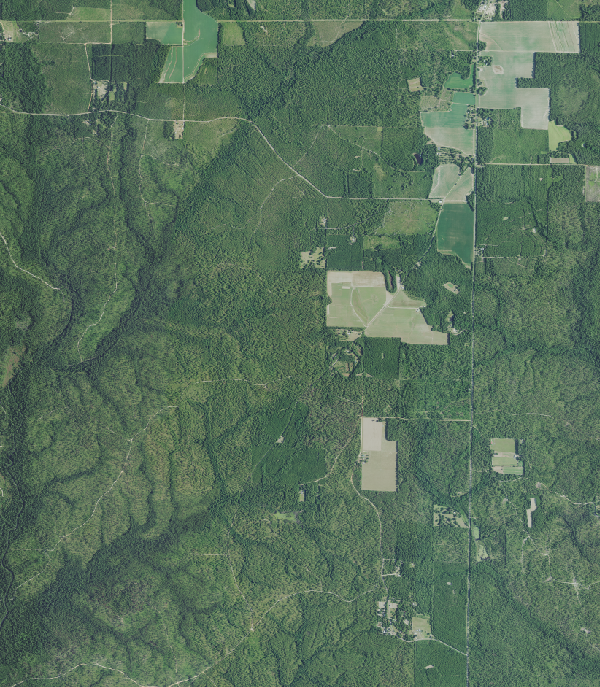

In [15]:
naip_raster = arcpy.Raster('/vsicurl/https://naipblobs.blob.core.windows.net/naip/v002/al/2015/al_100cm_2015/30086/m_3008601_ne_16_1_20150804.tif')
naip_raster 

Reading a raster from AWS or Azure into arcpy works just like reading a raster that is on your desktop. Hopefully you are starting to see that ArcGIS conceals some of the challenges of working with imagery in the cloud, enabling you to more easily access and analyze these datasets.